### Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Data Loading

In [5]:
df=pd.read_csv("processed_data.csv")

In [6]:
df.shape

(10000, 2)

In [7]:
df.head()

,cleaned_text,sentiment
0,device take huge amount battery thought id try...,positive
1,always bought nabis lasted couple year grandki...,negative
2,work great,positive
3,cant beat price bought best buy held well insi...,negative
4,really impressed item pretty slow,negative


In [8]:
tok=Tokenizer()
tok.fit_on_texts(df["cleaned_text"])

In [9]:
num_data=tok.texts_to_sequences(df["cleaned_text"])
print(num_data[:5])

[[39, 97, 614, 206, 1, 126, 294, 258, 28, 19, 226, 22, 9, 1], [114, 18, 1953, 49, 193, 32, 1612, 62, 18, 946, 32, 77, 579, 775, 1954, 49, 36, 470, 85, 35, 631, 20, 63, 1955, 210, 1956, 1116, 21, 186], [6, 2], [40, 134, 4, 18, 65, 10, 984, 19, 373, 3784, 150, 18, 88, 111, 1117, 175, 387, 709, 914, 2518, 81, 68, 252, 137, 915, 1165, 751, 1307, 671, 347, 726, 374], [46, 330, 62, 147, 127]]


In [10]:
vocab_size=len(tok.word_index)+1
print("Unique tokens size are {}.".format(vocab_size))

Unique tokens size are 4773.


In [11]:
tok.word_index.items()

dict_items([('battery', 1), ('great', 2), ('good', 3), ('price', 4), ('last', 5), ('work', 6), ('long', 7), ('amazon', 8), ('brand', 9), ('buy', 10), ('dont', 11), ('tablet', 12), ('use', 13), ('time', 14), ('product', 15), ('one', 16), ('like', 17), ('bought', 18), ('well', 19), ('would', 20), ('get', 21), ('name', 22), ('used', 23), ('kid', 24), ('duracell', 25), ('quality', 26), ('value', 27), ('seem', 28), ('better', 29), ('remote', 30), ('week', 31), ('year', 32), ('much', 33), ('life', 34), ('day', 35), ('month', 36), ('need', 37), ('store', 38), ('device', 39), ('cant', 40), ('far', 41), ('im', 42), ('got', 43), ('deal', 44), ('money', 45), ('really', 46), ('go', 47), ('purchase', 48), ('lasted', 49), ('ive', 50), ('love', 51), ('put', 52), ('lot', 53), ('never', 54), ('aa', 55), ('purchased', 56), ('fine', 57), ('still', 58), ('box', 59), ('fire', 60), ('cheap', 61), ('item', 62), ('charge', 63), ('didnt', 64), ('best', 65), ('even', 66), ('apps', 67), ('back', 68), ('basic', 6

In [12]:
with open(file="models/tokens.pkl",mode="wb") as file:
    pickle.dump(obj=tok,file=file)

In [13]:
pad_text=pad_sequences(sequences=num_data,maxlen=128,padding="post",truncating="post")

In [14]:
pad_text[:5]

array([[  39,   97,  614,  206,    1,  126,  294,  258,   28,   19,  226,
          22,    9,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 114,   18, 1953,   49,  193,   32, 1612,   62,   18,  946,   32,
          77,  579,  775, 1954,   49,   36,  470,   85,   35,

In [15]:
df.head()

,cleaned_text,sentiment
0,device take huge amount battery thought id try...,positive
1,always bought nabis lasted couple year grandki...,negative
2,work great,positive
3,cant beat price bought best buy held well insi...,negative
4,really impressed item pretty slow,negative


In [16]:
class_labels=df['sentiment'].unique().tolist()
class_labels.sort()
print(class_labels)

['negative', 'positive']


In [17]:
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'negative': 0, 'positive': 1}


In [18]:
df['sentiment']=df['sentiment'].map(class_dict)
df.head()

,cleaned_text,sentiment
0,device take huge amount battery thought id try...,1
1,always bought nabis lasted couple year grandki...,0
2,work great,1
3,cant beat price bought best buy held well insi...,0
4,really impressed item pretty slow,0


In [19]:
y=df['sentiment'].values
print(y.tolist())

[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 

### Data Splitting

In [20]:
y=to_categorical(y)
X_train,X_test,y_train,y_test=train_test_split(pad_text,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8000, 128) (2000, 128) (8000, 2) (2000, 2)


In [21]:
embeddings_index = {}
with open('input/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
embedding_dimention = 50
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index)+1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = embedding_matrix_creater(50, word_index=tok.word_index)
print("Glove Loded!")

Glove Loded!


In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU,Flatten,Embedding
from tensorflow.keras.optimizers import Adam

In [24]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=pad_text.shape[1],weights=[embedding_matrix]))
model.add(GRU(units=100,return_sequences=True))
model.add(GRU(units=100,return_sequences=True))
model.add(Flatten())
model.add(Dropout(rate=0.4))
model.add(Dense(256,activation='relu'))
model.add(Dense(len(class_labels),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 50)           238650    
                                                                 
 gru (GRU)                   (None, 128, 100)          45600     
                                                                 
 gru_1 (GRU)                 (None, 128, 100)          60600     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout (Dropout)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 256)               3277056   
                                                                 
 dense_1 (Dense)             (None, 2)                 5

In [26]:
number_of_epochs=20
history=model.fit(x=X_train,y=y_train,batch_size=64,epochs=number_of_epochs,validation_data=(X_test,y_test))

Epoch 1/20
125/125 [==============================] - 29s 151ms/step - loss: 0.3675 - accuracy: 0.8376 - val_loss: 0.3529 - val_accuracy: 0.8415
Epoch 2/20
125/125 [==============================] - 12s 93ms/step - loss: 0.2321 - accuracy: 0.9090 - val_loss: 0.2182 - val_accuracy: 0.9035
Epoch 3/20
125/125 [==============================] - 6s 50ms/step - loss: 0.1631 - accuracy: 0.9375 - val_loss: 0.1818 - val_accuracy: 0.9255
Epoch 4/20
125/125 [==============================] - 5s 40ms/step - loss: 0.1170 - accuracy: 0.9581 - val_loss: 0.1777 - val_accuracy: 0.9425
Epoch 5/20
125/125 [==============================] - 3s 26ms/step - loss: 0.0868 - accuracy: 0.9676 - val_loss: 0.1440 - val_accuracy: 0.9470
Epoch 6/20
125/125 [==============================] - 4s 31ms/step - loss: 0.0693 - accuracy: 0.9754 - val_loss: 0.2005 - val_accuracy: 0.9370
Epoch 7/20
125/125 [==============================] - 4s 30ms/step - loss: 0.0554 - accuracy: 0.9804 - val_loss: 0.1747 - val_accuracy: 0.9

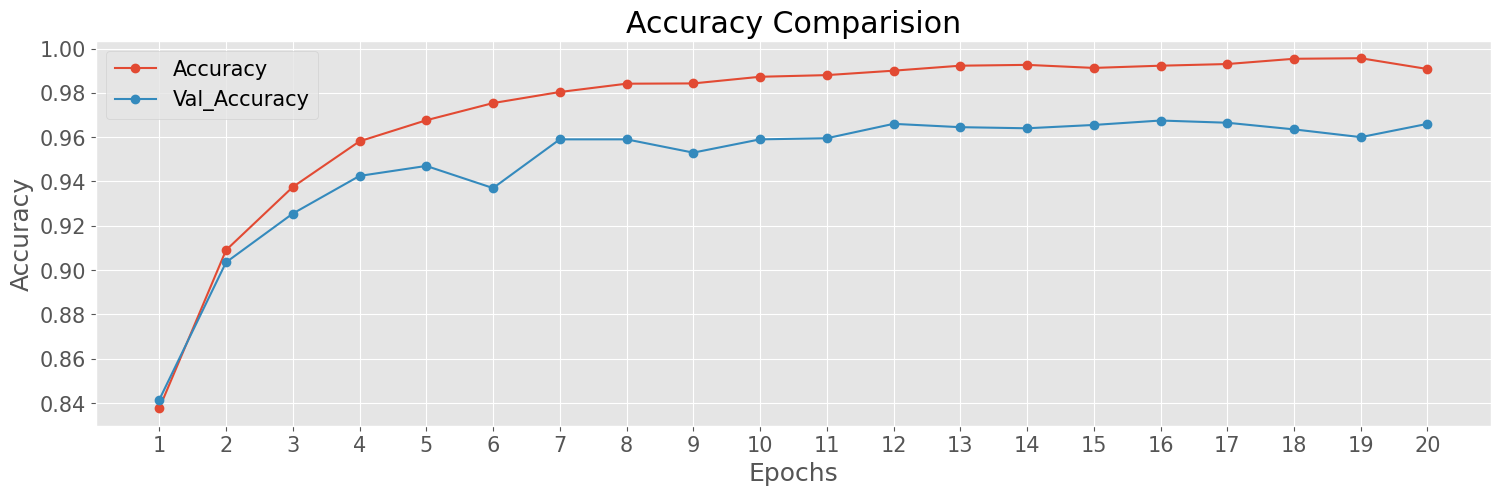

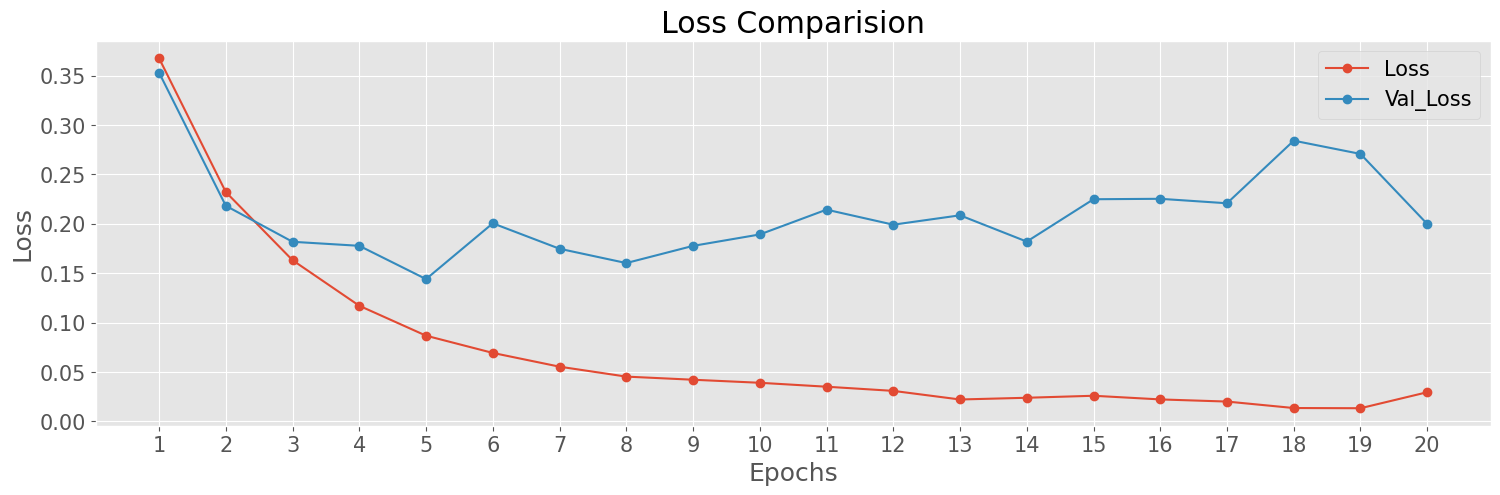

In [27]:
with plt.style.context(style="ggplot"):
    plt.figure(figsize=(18,5))
    plt.rcParams['font.size'] = 15
    plt.plot([str(i) for i in range(1, len(history.history["accuracy"])+1)], history.history["accuracy"],label="Accuracy", marker='o')
    plt.plot([str(i) for i in range(1, len(history.history["val_accuracy"])+1)], history.history["val_accuracy"],label="Val_Accuracy", marker='o')
    plt.title(label="Accuracy Comparision")
    plt.xlabel(xlabel="Epochs")
    plt.ylabel(ylabel="Accuracy")
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,5))
    plt.rcParams['font.size'] = 15
    plt.plot([str(i) for i in range(1, len(history.history["loss"])+1)], history.history["loss"],label="Loss", marker='o')
    plt.plot([str(i) for i in range(1, len(history.history["val_loss"])+1)], history.history["val_loss"],label="Val_Loss", marker='o')
    plt.title(label="Loss Comparision")
    plt.xlabel(xlabel="Epochs")
    plt.ylabel(ylabel="Loss")
    plt.legend()
    plt.show()

In [28]:
gru_prediction=model.predict(X_test,batch_size=64,verbose=1)
print(gru_prediction)

32/32 [==============================] - 1s 8ms/step
[[3.2652979e-06 9.9999678e-01]
 [9.9901593e-01 9.7069616e-04]
 [4.2661982e-06 9.9999499e-01]
 ...
 [9.9998629e-01 2.3745240e-05]
 [1.0000000e+00 5.8714074e-14]
 [1.0000000e+00 3.4352954e-10]]


In [29]:
gru_pred=[]
for prediction in gru_prediction:
    gru_pred.append(np.argmax(prediction))
print(gru_pred)

[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [30]:
true_labels=[]
for label in y_test:
    true_labels.append(np.argmax(label))
print(true_labels)

[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

### Result Analysis

***Accuracy Score***

In [31]:
gru_accuracy=accuracy_score(y_true=true_labels,y_pred=gru_pred)
print(f"Validation accuracy of GatedRecurrentUnit is {gru_accuracy*100.0:0.2f}%")

Validation accuracy of GatedRecurrentUnit is 96.60%


***Classification Report***

In [32]:
print(classification_report(y_true=true_labels,y_pred=gru_pred,target_names=class_labels))

              precision    recall  f1-score   support

    negative       0.95      0.98      0.97      1000
    positive       0.98      0.95      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



***Confusion Matrix***

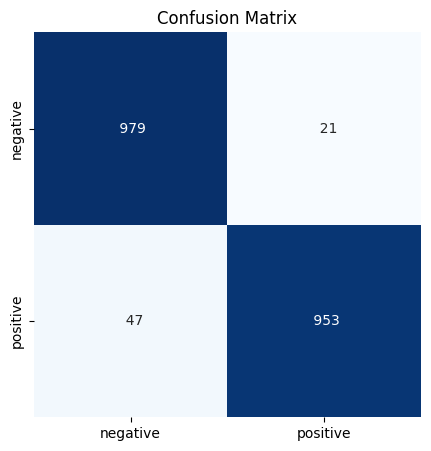

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_true=true_labels,
                                      y_pred=gru_pred),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.show()

In [34]:
model.save("models/GatedRecurrentUnit_model.h5")

# Thank You